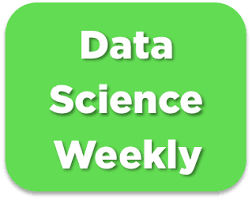

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [110]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# import base estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    f1_score, 
    classification_report,
    ConfusionMatrixDisplay,
    recall_score,
    RocCurveDisplay)

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("datas/conversion_data_train_EDA.csv")

In [112]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


## Baseline

**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [113]:
target = "converted"
to_drop = ["country", "age", "new_user", "source", "converted"]
x = data.drop(columns=to_drop) 
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

numerical_columns = x_train.select_dtypes(include=["float", "int"]).columns

display(x.head())
print("y :", y)
print("numerical_columns :", numerical_columns)

,total_pages_visited
0,2
1,3
2,14
3,3
4,3


y : 0         0
1         0
2         1
3         0
4         0
         ..
283558    0
283559    0
283560    0
283561    0
283562    0
Name: converted, Length: 283563, dtype: int64
numerical_columns : Index(['total_pages_visited'], dtype='object')


In [114]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns)
    ])

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test) 

#### Regression logistique

In [115]:
# Train model
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [116]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [117]:
print("f1-score on training set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()
print("recall_score on training set : ", recall_score(y_train, y_train_pred))
print("recall_score on test set : ", recall_score(y_test, y_test_pred))

f1-score on training set :  0.6967457946863701
f1-score on test set :  0.6897856242118537

recall_score on training set :  0.603979285908967
recall_score on test set :  0.5961852861035423


In [118]:
scores = cross_val_score(lr, x_train, y_train, cv=3)
print("The cross-validated mean score is : ", scores.mean())
print("The standard deviation is : ", scores.std())

The cross-validated mean score is :  0.9829931672905006
The standard deviation is :  0.0002483492213742222


In [119]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    219512
           1       0.82      0.60      0.70      7338

    accuracy                           0.98    226850
   macro avg       0.91      0.80      0.84    226850
weighted avg       0.98      0.98      0.98    226850



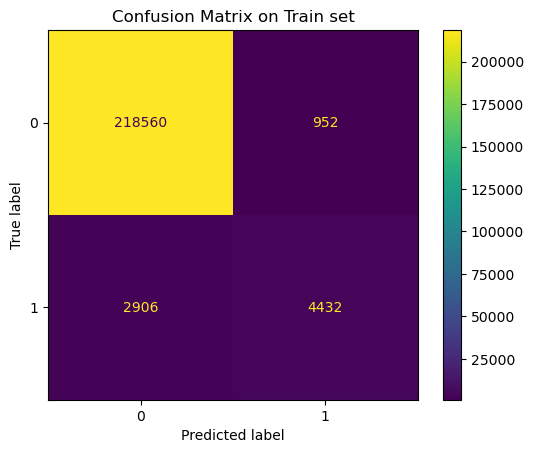

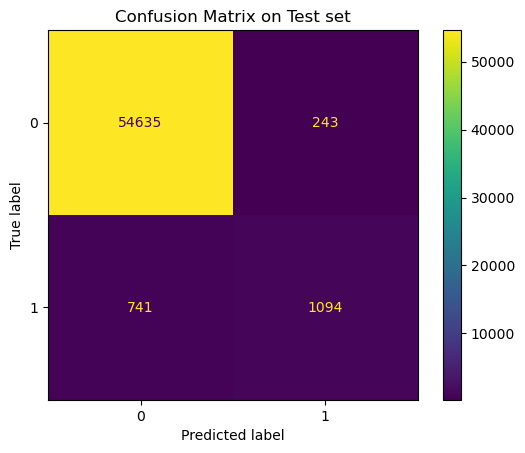

In [120]:
# Visualize confusion matrices
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    lr, x_train, y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    lr, x_test, y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

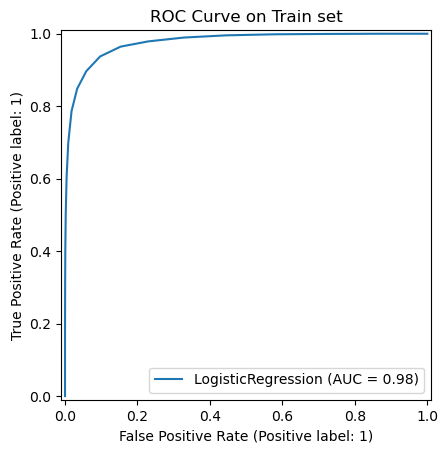

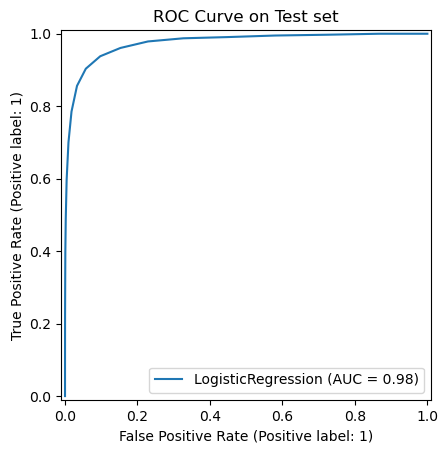

In [121]:
# Visualize ROC curves
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    lr, x_train, y_train, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    lr, x_test, y_test, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

----

## make predictions on X_without_labels

In [ ]:
# Read data without labels
data_without_labels = pd.read_csv("datas/conversion_data_test_EDA.csv")

to_drop = ["country", "age", "new_user", "source"]
x_without_labels = data_without_labels.drop(columns=to_drop) 

x_without_labels = preprocessor.transform(x_without_labels)
y_pred_without_label = lr.predict(x_without_labels)

# Read target without labels
y_without_labels = pd.read_csv("datas/conversion_data_test_labels_EDA.csv")

print("f1-score on set without labels : ", f1_score(y_without_labels, y_pred_without_label))
print()
print("recall_score on set without labels : ", recall_score(y_without_labels, y_pred_without_label))

f1-score on set without labels :  0.6950596252129472

recall_score on set without labels :  0.6017699115044248


Sauvegarde des résultats dans un dataframe

In [123]:
scores_df = pd.DataFrame(columns = ["model", "f1", "recall"])

new_rows = [
    {"model": "baseline", "f1": f1_score(y_without_labels, y_pred_without_label), "recall": recall_score(y_without_labels, y_pred_without_label)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

C:\Users\janda\AppData\Local\Temp\ipykernel_3404\217715370.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)


,model,f1,recall
0,baseline,0.69506,0.60177


In [ ]:
scores_df.to_csv("datas/scores.csv", mode="w", index=False)